In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from common import *

In [24]:
keys = ['roc_auc', 'pr_auc']

In [25]:
def filter_results(pattern) :
    return yr_df.filter(regex=pattern, axis=0)

In [75]:
def get_index(model) :
    return yr_df.loc[model]

In [66]:
yr_df = []
for model in ['baselines', 'Basic', 'Attention', 'Structured Attention', 'Hierarchical Attention'] :
    name = os.path.join('outputs/Mortality_1yr', model)
    if os.path.exists(name) :
        dirs = os.listdir(name)
        dfs = {}
        for d in sorted(dirs) :
            dirname = os.path.join(name, d)
            model_name = get_latest_model(dirname)
            if model_name is not None :
                df = json.load(open(os.path.join(model_name, 'evaluate.json')))
                dfs[d] = {k:v for k, v in df.items() if k in keys}

        dfs = pd.DataFrame(dfs).transpose()
        yr_df += [dfs]
        
yr_df = pd.concat(yr_df, axis=0).round(3)
display(HTML(filter_results('LR+').to_html()))
display(HTML(filter_results('Average+').to_html()))
display(HTML(filter_results('CNN+').to_html()))
display(HTML(filter_results('LSTM+').to_html()))
display(HTML(filter_results('SRU+').to_html()))

,pr_auc,roc_auc
LR+BOW+norm=None,0.678,0.820
LR+BOW+norm=None+Structured,0.695,0.836
LR+BOW+norm=l1,0.590,0.770
LR+BOW+norm=l1+Structured,0.620,0.832
LR+BOW+norm=l2,0.765,0.882
LR+BOW+norm=l2+Structured,0.783,0.897
LR+BinaryBOW+norm=None,0.678,0.820
LR+BinaryBOW+norm=None+Structured,0.695,0.836
LR+BinaryBOW+norm=l1,0.590,0.770
LR+BinaryBOW+norm=l1+Structured,0.620,0.832


,pr_auc,roc_auc
Average(hs=256),0.695,0.866
Average(hs=256)+Structured,0.707,0.866
Average(hs=256)+Attention(additive)(hs=128),0.747,0.880
Average(hs=256)+Attention(additive)(hs=128)+Structured,0.776,0.895
Average(hs=256)+Attention(additive)(all)(hs=128),0.784,0.901
Average(hs=256)+Attention(additive)(all)(hs=128)+Structured,0.778,0.897


,pr_auc,roc_auc
"CNN(hs=64)(kernels=3,5,7,9)",0.742,0.875
"CNN(hs=64)(kernels=3,5,7,9)+Structured",0.765,0.889
"CNN(hs=64)(kernels=3,5,7,9)+Attention(additive)(hs=128)",0.758,0.882
"CNN(hs=64)(kernels=3,5,7,9)+Attention(additive)(hs=128)+Structured",0.783,0.898
"CNN(hs=64)(kernels=3,5,7,9)+Attention(additive)(all)(hs=128)",0.787,0.902
"CNN(hs=64)(kernels=3,5,7,9)+Attention(additive)(all)(hs=128)+Structured",0.787,0.900


,pr_auc,roc_auc
LSTM(hs=128),0.766,0.880
LSTM(hs=128)+Structured,0.710,0.863
LSTM(hs=128)+Attention(additive)(hs=128),0.767,0.887
LSTM(hs=128)+Attention(additive)(hs=128)+Structured,0.781,0.898
LSTM(hs=128)+Attention(additive)(all)(hs=128),0.786,0.900
LSTM(hs=128)+Attention(additive)(all)(hs=128)+Structured,0.786,0.900


,pr_auc,roc_auc
SRU(hs=128),0.665,0.826
SRU(hs=128)+Structured,0.678,0.850
SRU(hs=128)+Attention(additive)(hs=128)+Structured,0.782,0.900


In [80]:
import matplotlib.pyplot as plt
lr_roc = get_index('LR+BOW+norm=l2+Structured')['roc_auc']
lstm_roc = get_index('LSTM(hs=128)+Structured')['roc_auc']
attn_roc = get_index('LSTM(hs=128)+Attention(additive)(hs=128)+Structured')['roc_auc']

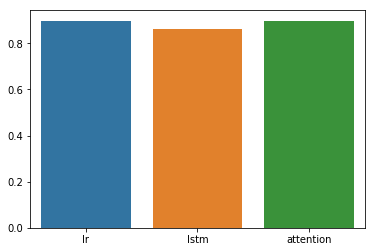

In [82]:
import seaborn as sns
sns.barplot(x=['lr', 'lstm', 'attention'], y=[lr_roc, lstm_roc, attn_roc])